# Classification using k-NN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

defaulter = pd.read_csv("C:\\D\\infosys\\datasets\\datasets\\defaulter\\defaulter.csv")
defaulter

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


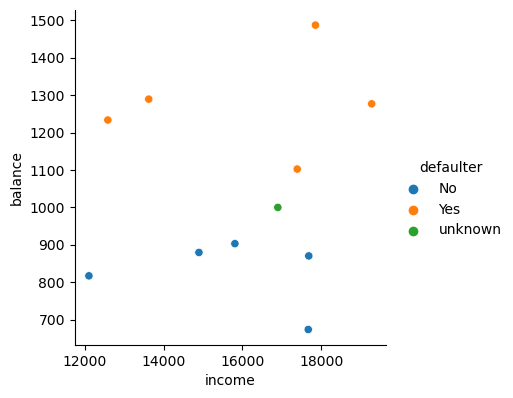

In [2]:
import seaborn as sns

sns.pairplot(defaulter, hue = "defaulter", x_vars = "income", y_vars = "balance", height = 4)

In [3]:
x1 = defaulter.loc[0, ["balance", "income"]]
x2 = defaulter.loc[1, ["balance", "income"]]

np.linalg.norm(x1-x2)

5787.1537602581275

In [4]:
t1 = np.array([26, 1000])
t2 = np.array([66, 1000])
t3 = np.array([36, 10000])

dist_t3_t1 = np.linalg.norm(t3-t1)

dist_t2_t3 = np.linalg.norm(t2-t3)

print("Distance between t2 and t3", dist_t2_t3, "\nDistance between t1 and t3", dist_t3_t1)

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


As seen above the distance between the t1 and t3 is the same as the t2 and t3 

The above stuff happened due to the matter tha tthe euclidean distance is highly affected by the range and henceforth we apply normalization to the data

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance", "income"]])
defaulter["norm_balance"] = scaled_values[:, 0]
defaulter["norm_income"] = scaled_values[:, 1]
defaulter

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [9]:
x1_n = defaulter.loc[0, ["norm_balance", "norm_income"]]
x2_n = defaulter.loc[1, ["norm_balance", "norm_income"]]
np.linalg.norm(x1_n-x2_n)

1.1489497815843788

In [16]:
x11 = defaulter.loc[10, ["norm_balance", "norm_income"]]
dist_to_x11 = lambda x: np.linalg.norm(x-x11)

defaulter["dist_to_x11"] = defaulter[["norm_balance", "norm_income"]].apply(dist_to_x11, axis =1)
defaulter.sort_values("dist_to_x11")


,defaulter,student,balance,income,norm_balance,norm_income,dist_to_x11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


# Buliding k - NN using sklearn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

defaulter = pd.read_csv("C://D//infosys//datasets//datasets//defaulter//defaulter.csv")